<a href="https://www.kaggle.com/code/francescoliveras/ps-s3-e24-eda-model-en-es?scriptVersionId=147787563" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S3 E23 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>

**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Smoker Status Prediction using Bio-Signals dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

**Archivos**

* ```train.csv``` - the training dataset; smoking is the binary target
* ```test.csv``` - the test dataset; your objective is to predict the probability of positive smoking
* ```sample_submission.csv``` - a sample submission file in the correct format


**🟥ES**:

El conjunto de datos para esta competición (tanto de entrenamiento como de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en el conjunto de datos Smoker Status Prediction using Bio-Signals. Las distribuciones de las características son similares, aunque no exactamente iguales, a las del original. Siéntase libre de utilizar el conjunto de datos original como parte de esta competición, tanto para explorar las diferencias como para ver si la incorporación del original en el entrenamiento mejora el rendimiento del modelo.

**Archivos

* ```train.csv``` - el conjunto de datos de entrenamiento; fumar es el objetivo binario.
* ```test.csv``` - el conjunto de datos de prueba; su objetivo es predecir la probabilidad de tabaquismo positivo
* ```sample_submission.csv``` - un archivo de envío de muestra en el formato correcto


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Library import</p>

In [1]:
import os 
import sys
import math
import time
import random
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL
plt.style.use({"figure.facecolor": "#282a36"})

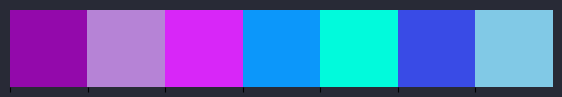

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]
INCLUDE_ORIGINAL = True
SEED = 18
FOLDS = 5
N_SPLITS = 7
sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))

warnings.filterwarnings('ignore')

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PS_PATH = "/kaggle/input/playground-series-s3e24"
ORIGINAL_PATH = "/kaggle/input/smoker-status-prediction-using-biosignals"

PS_TRAIN_FILENAME = "train.csv"
PS_TEST_FILENAME = "test.csv"
OR_TRAIN_FILENAME = "train_dataset.csv"
OR_TEST_FILENAME = "test_dataset.csv"
SAMPLE_SUBMISSION_FILENAME = "sample_submission.csv"

TRAIN_PS_PATH = os.path.join(PS_PATH, PS_TRAIN_FILENAME)
TEST_PS_PATH = os.path.join(PS_PATH, PS_TEST_FILENAME)
TRAIN_OR_PATH = os.path.join(ORIGINAL_PATH, OR_TRAIN_FILENAME)
TEST_OR_PATH = os.path.join(ORIGINAL_PATH, OR_TEST_FILENAME)
SUBMISSION_PATH = os.path.join(PS_PATH, SAMPLE_SUBMISSION_FILENAME)

In [5]:
TARGET = "smoking"

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [6]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    # sns.heatmap(corr, annot = False, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    if df.shape[1] < 25:
        sns.heatmap(corr, annot=True, linewidths=.5, fmt=".2f", square=True, mask=mask, cmap=cmap_2)
    else:
        sns.heatmap(corr, annot=False, linewidths=.5, square=True, mask=mask, cmap=cmap_2)

    plt.show()

In [7]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [8]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

In [9]:
def pie_plot(df: pd.DataFrame, hover_temp: str = "Status: ",
            feature=TARGET, palette=[LIGTH_BLUE,"#221e8f"], color=[BLUE ,PURPLE_DARJ],
            title_="Target distribution"):
#     df[feature] = df[feature].replace({0: "Not cancelled ", 1: "Cancelled"})
    target = df[[feature]].value_counts(normalize=True).sort_index().round(decimals=3)*100
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                        sort=False, showlegend=True, marker=dict(colors=color, line=dict(color=palette,width=2)),
                        hovertemplate = "%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title_, 
                  legend=dict(traceorder="reversed",y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode="hide",height=600)
    fig.show()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [10]:
train_ps_df = pd.read_csv(TRAIN_PS_PATH, index_col="id")
test_ps_df = pd.read_csv(TEST_PS_PATH, index_col="id")
train_or_df = pd.read_csv(TRAIN_OR_PATH)
test_or_df = pd.read_csv(TEST_OR_PATH)
submission_df = pd.read_csv(SUBMISSION_PATH)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [11]:
data_description(train_ps_df)
data_description(test_ps_df)
data_description(train_or_df)
data_description(test_or_df)

Data description
Total number of records 159256
number of features 23


                   Name     Type  Unique levels  Missing
0                   age    int64             18        0
1            height(cm)    int64             14        0
2            weight(kg)    int64             28        0
3             waist(cm)  float64            531        0
4        eyesight(left)  float64             20        0
5       eyesight(right)  float64             17        0
6         hearing(left)    int64              2        0
7        hearing(right)    int64              2        0
8              systolic    int64            112        0
9            relaxation    int64             75        0
10  fasting blood sugar    int64            229        0
11          Cholesterol    int64            227        0
12         triglyceride    int64            392        0
13                  HDL    int64            108        0
14                  LDL    int64            222        0
15           hem

In [12]:
train_df = pd.concat([train_ps_df, train_or_df], ignore_index=True)
data_description(train_df)

Data description
Total number of records 198240
number of features 23


                   Name     Type  Unique levels  Missing
0                   age    int64             18        0
1            height(cm)    int64             15        0
2            weight(kg)    int64             29        0
3             waist(cm)  float64            548        0
4        eyesight(left)  float64             20        0
5       eyesight(right)  float64             18        0
6         hearing(left)    int64              2        0
7        hearing(right)    int64              2        0
8              systolic    int64            128        0
9            relaxation    int64             94        0
10  fasting blood sugar    int64            259        0
11          Cholesterol    int64            279        0
12         triglyceride    int64            393        0
13                  HDL    int64            123        0
14                  LDL    int64            286        0
15           hem

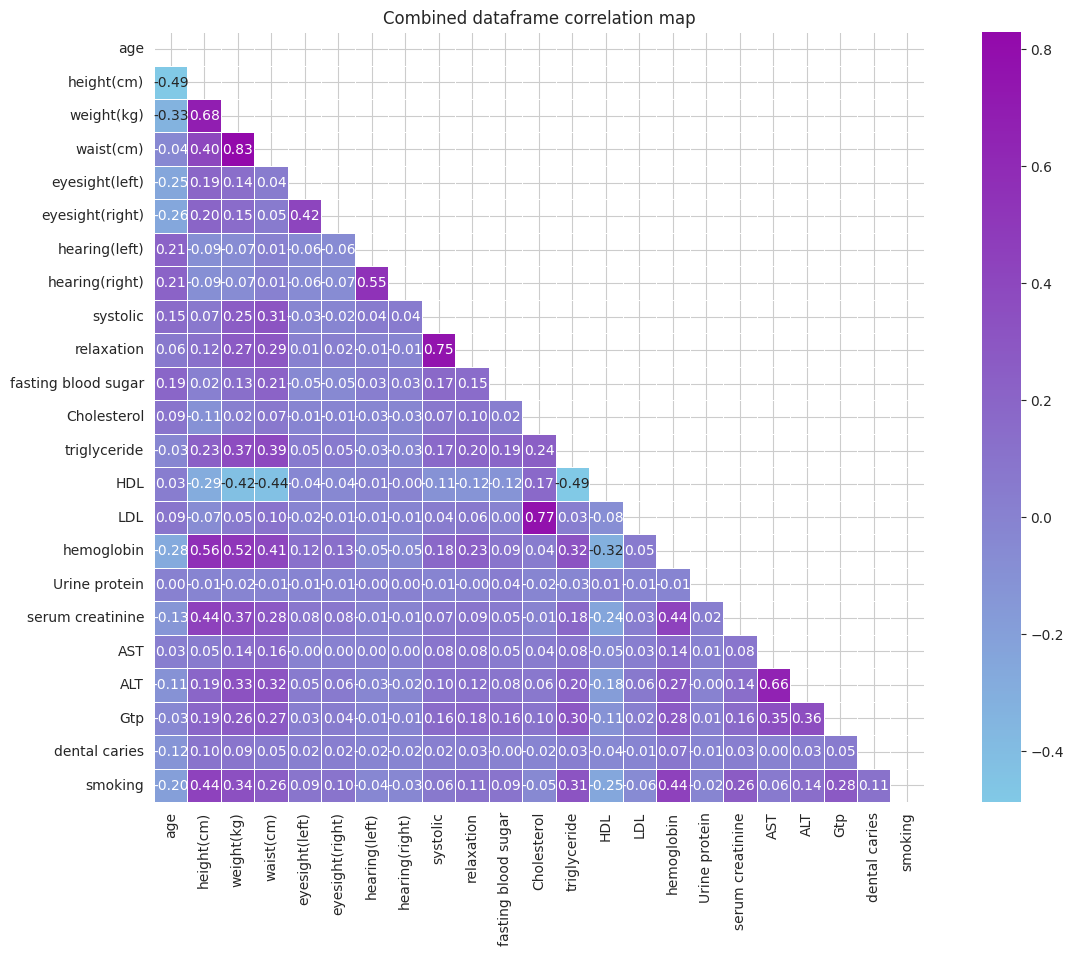

None

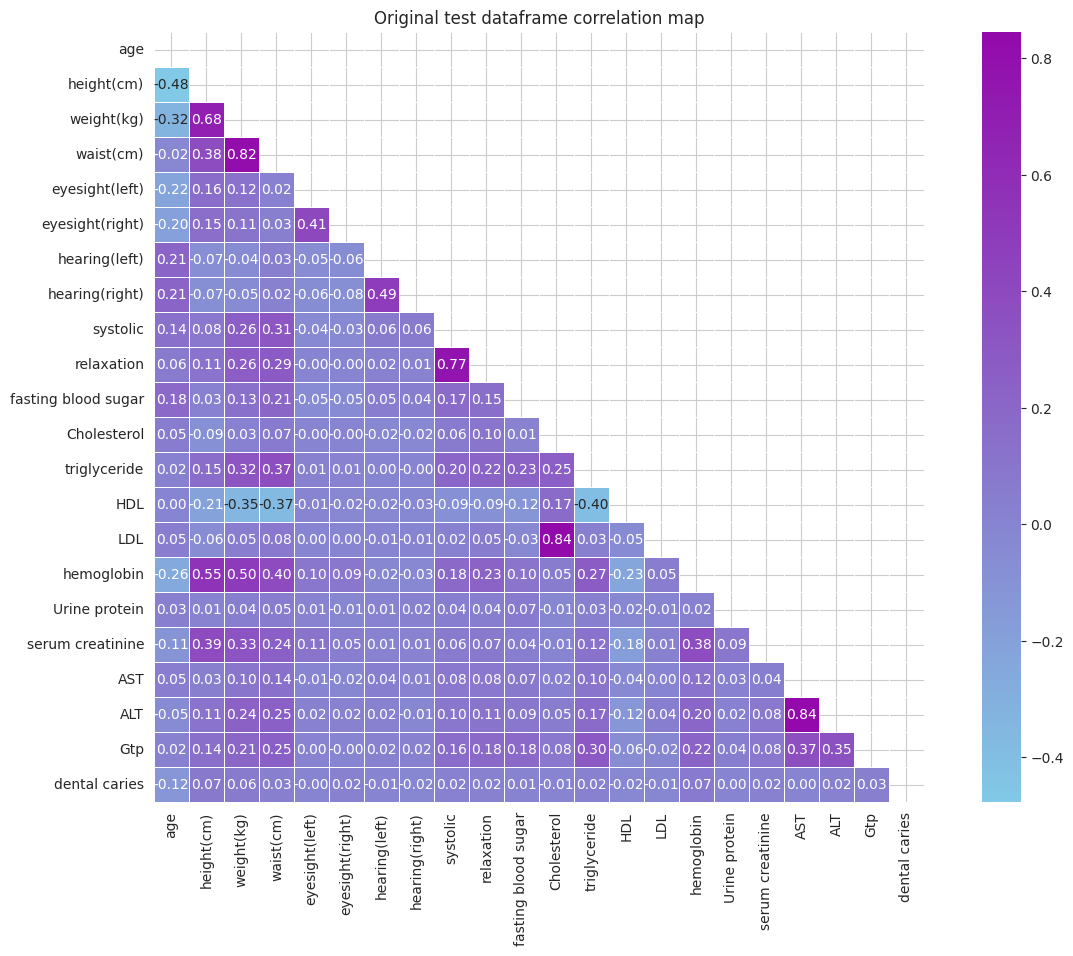

None

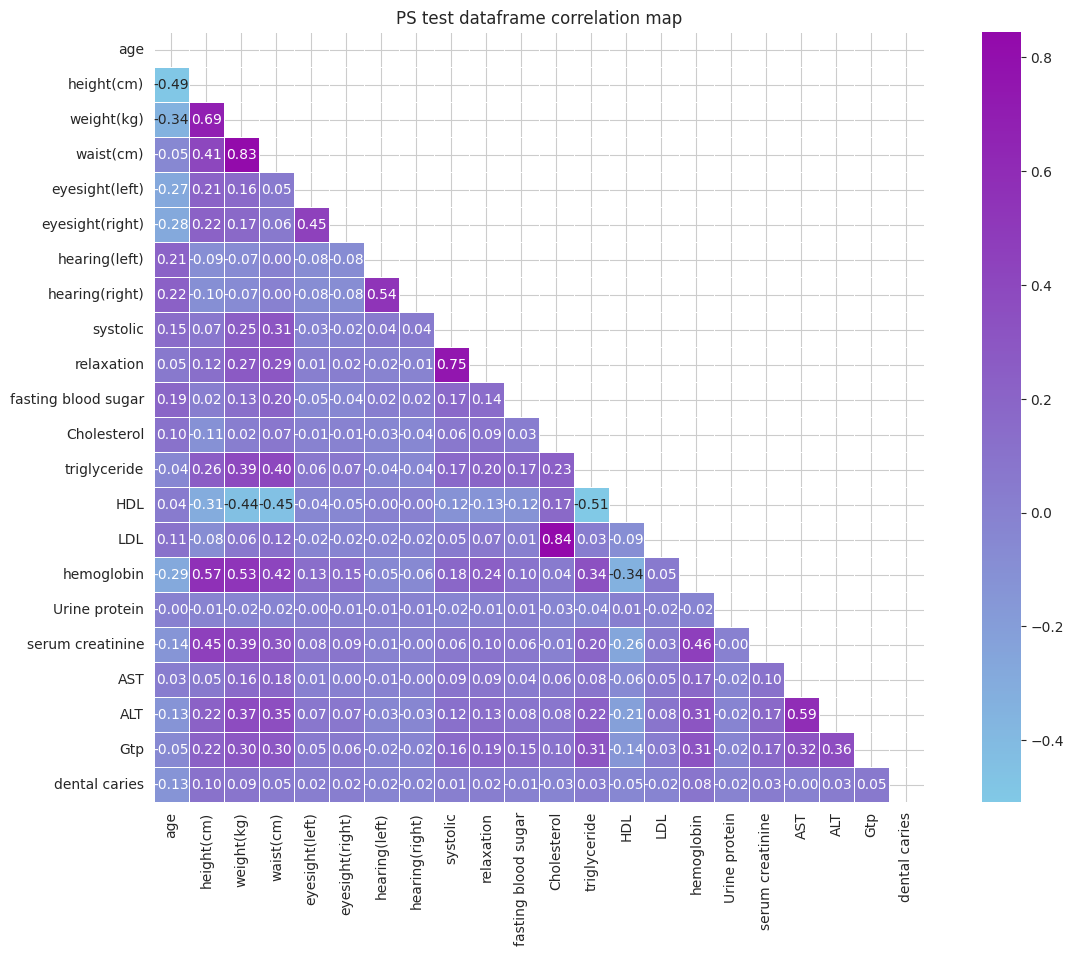

None

In [13]:
display(show_corr_heatmap(train_df, "Combined dataframe correlation map"))
display(show_corr_heatmap(test_or_df, "Original test dataframe correlation map"))
display(show_corr_heatmap(test_ps_df, "PS test dataframe correlation map"))

In [14]:
display(pie_plot(train_df))

None